In [6]:

def sgd_adagrad (parameters, sqrs, lr):
    eps = 1e-10
    for param, sqr in zip(parameters, sqrs):
        sqr[:] = sqr + param.grad.data ** 2
        div = lr / torch.sqrt(sqr + eps) * param.grad.data
        param.data = param.data - div

In [7]:
import  numpy as  np
import  torch
from  torchvision.datasets  import MNIST
from torch.utils.data import DataLoader
from torch import nn
from torch.autograd import Variable
import time
import matplotlib.pyplot as plt
%matplotlib inline

def data_tf(x):
    x = np.array(x, dtype='float32') / 255
    x = (x - 0.5) / 0.5 
    x = x.reshape((-1,)) 
    x = torch.from_numpy(x)
    return x

train_set = MNIST('./data', train=True, transform=data_tf, download=True) 
test_set = MNIST('./data', train=False, transform=data_tf, download=True)
criterion = nn.CrossEntropyLoss()

In [8]:
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

sqrs = []
for param in net.parameters():
    sqrs.append(torch.zeros_like(param.data))
    
losses = []
idx = 0
start = time.time() 
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # forward
        out = net(im)
        loss = criterion(out, label)
        # backward
        net.zero_grad()
        loss.backward()
        sgd_adagrad(net.parameters(), sqrs, 1e-2) 
        # loss
        train_loss += loss.data[0]
        if idx % 30 == 0:
            losses.append(loss.data[0])
        idx += 1
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end = time.time() 
print('time: {:.5f} s'.format(end - start))

/home/xiuchao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/home/xiuchao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch: 0, Train Loss: 0.393474
epoch: 1, Train Loss: 0.240165
epoch: 2, Train Loss: 0.198809
epoch: 3, Train Loss: 0.174623
epoch: 4, Train Loss: 0.157390
time: 22.88815 s


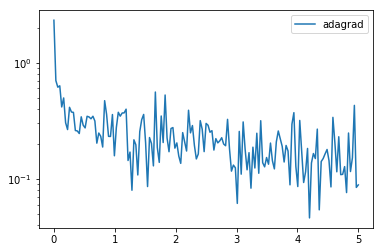

In [12]:
x_axis =  np.linspace(0, 5, len(losses), endpoint=True)
plt.semilogy(x_axis, losses, label='adagrad')
plt.legend(loc='best')

In [13]:
# ---- built-in adagrad -----
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)
 
optimizer = torch.optim.Adagrad(net.parameters(), lr=1e-2)

start = time.time() 
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # forward
        out = net(im)
        loss = criterion(out, label)
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # loss
        train_loss += loss.data[0]
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end = time.time() # 计时结束
print('time: {:.5f} s'.format(end - start))

/home/xiuchao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch: 0, Train Loss: 0.401065
epoch: 1, Train Loss: 0.249366
epoch: 2, Train Loss: 0.211117
epoch: 3, Train Loss: 0.187349
epoch: 4, Train Loss: 0.170869
time: 23.71743 s


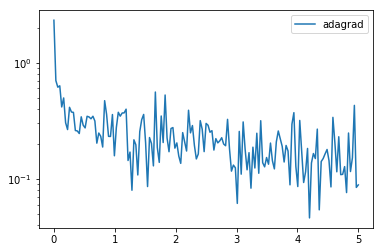

In [14]:
x_axis = np.linspace(0, 5, len(losses), endpoint=True)
plt.semilogy(x_axis, losses, label='adagrad')
plt.legend(loc='best')